In [1]:
import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

import pandas as pd
from deltalake import DeltaTable
from src.utils import WMAPE, wmape

df = DeltaTable("deltalake").to_pandas()
df = df.sort_values(by=["unique_id", "ds"]).reset_index(drop=True)

In [2]:
df.shape

(89117, 3)

In [3]:
TEMPO_FILTRO_PARA_TESTE = "2018-01-01"

df = df.loc[df["ds"] > TEMPO_FILTRO_PARA_TESTE]

FILTRA_IDS = df["unique_id"].unique()[:2]

df = df[df["unique_id"].isin(FILTRA_IDS)]

In [4]:
df.shape

(3468, 3)

In [5]:
train = df.loc[df["ds"] < "2024-09-01"]
valid = df.loc[(df["ds"] >= "2024-09-01") & (df["ds"] < "2024-12-20")]
h = valid["ds"].nunique()

In [31]:
h

77

In [6]:
from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoLSTM

models = [AutoLSTM(h=h, num_samples=30, loss=WMAPE())]

model = NeuralForecast(models=models, freq="D")

21min 33.3s

In [7]:
model.fit(train, val_size=30)

p = model.predict().reset_index()
p = p.merge(valid[["ds", "unique_id", "y"]], on=["ds", "unique_id"], how="left")
print(wmape(p["y"], p["AutoLSTM"]))

(_train_tune pid=2692) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=2692) Seed set to 5
(_train_tune pid=2692) GPU available: True (cuda), used: True
(_train_tune pid=2692) TPU available: False, using: 0 TPU cores
(_train_tune pid=2692) HPU available: False, using: 0 HPUs
(_train_tune pid=2692) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_train_tune pid=2692) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(_train_tune 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 60.39it/s, v_num=0, train_loss_step=0.684, train_loss_epoch=0.669]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2692) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 63.07it/s, v_num=0, train_loss_step=0.351, train_loss_epoch=0.723, valid_loss=0.193]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2692) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 58.40it/s, v_num=0, train_loss_step=0.674, train_loss_epoch=0.479, valid_loss=0.0506]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 55.26it/s, v_num=0, train_loss_step=0.688, train_loss_epoch=1.010, valid_loss=0.0618]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 53.54it/s, v_num=0, train_loss_step=0.

(_train_tune pid=2692) `Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 56.01it/s, v_num=0, train_loss_step=0.704, train_loss_epoch=0.654, valid_loss=0.0714]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 17.26it/s, v_num=0, train_loss_step=0.704, train_loss_epoch=0.704, valid_loss=0.0623]


(_train_tune pid=2878) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=2878) Seed set to 2
(_train_tune pid=2878) GPU available: True (cuda), used: True
(_train_tune pid=2878) TPU available: False, using: 0 TPU cores
(_train_tune pid=2878) HPU available: False, using: 0 HPUs
(_train_tune pid=2878) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_train_tune pid=2878) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(_train_tune 

Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  5.40it/s, v_num=0, train_loss_step=0.538, train_loss_epoch=0.538]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2878) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  4.86it/s, v_num=0, train_loss_step=0.451, train_loss_epoch=0.462, valid_loss=0.0487]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2878) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  5.16it/s, v_num=0, train_loss_step=0.493, train_loss_epoch=0.505, valid_loss=0.0361]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2878) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  5.50it/s, v_num=0, train_loss_step=0.531, train_loss_epoch=0.502, valid_loss=0.0324]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [

(_train_tune pid=2878) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=3619) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=3619) Seed set to 3
(_train_tune pid=3619) GPU available: True (cuda), used: True
(_train_tune pid=3619) TPU available: False, using: 0 TPU cores
(_train_tune pid=3619) HPU available: False, using: 0 HPUs
(_train_tune pid=3619) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_trai

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 15.08it/s, v_num=0, train_loss_step=0.410, train_loss_epoch=0.714]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=3619) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 14.15it/s, v_num=0, train_loss_step=0.665, train_loss_epoch=0.414, valid_loss=0.0523]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=3619) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 13.31it/s, v_num=0, train_loss_step=0.715, train_loss_epoch=0.513, valid_loss=0.063]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=3619) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 13.70it/s, v_num=0, train_loss_step=0.624, train_loss_epoch=0.632, valid_loss=0.0388]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [0

(_train_tune pid=3619) `Trainer.fit` stopped: `max_steps=500` reached.


(_train_tune pid=3619) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s, v_num=0, train_loss_step=0.534, train_loss_epoch=0.534, valid_loss=0.0825]


(_train_tune pid=3824) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=3824) Seed set to 10
(_train_tune pid=3824) GPU available: True (cuda), used: True
(_train_tune pid=3824) TPU available: False, using: 0 TPU cores
(_train_tune pid=3824) HPU available: False, using: 0 HPUs
(_train_tune pid=3824) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_train_tune pid=3824) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(_train_tune

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 118.94it/s, v_num=0, train_loss_step=0.649, train_loss_epoch=0.670]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 110.70it/s, v_num=0, train_loss_step=0.706, train_loss_epoch=0.618, valid_loss=0.0749]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 117.09it/s, v_num=0, train_loss_step=0.764, train_loss_epoch=0.670, valid_loss=0.0544]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 108.06it/s, v_num=0, train_loss_step=0.645, train_loss_epoch=0.758, valid_loss=0.0671]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 73.37it/s, v_num=0, train_loss_step=0.910, train_loss_epoch=0.558, valid_loss=0.0618]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune

(_train_tune pid=3824) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=3945) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=3945) Seed set to 15
(_train_tune pid=3945) GPU available: True (cuda), used: True
(_train_tune pid=3945) TPU available: False, using: 0 TPU cores
(_train_tune pid=3945) HPU available: False, using: 0 HPUs
(_train_tune pid=3945) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_tra

Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
                                                                           
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 41.40it/s, v_num=0, train_loss_step=0.521, train_loss_epoch=0.523]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 71.35it/s]
(_train_tune pid=3945) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 23.73it/s, v_num=0, train_loss_step=0.500, train_loss_epoch=0.501, valid_loss=0.0344]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 43.93it/s]
(_train_tune pid=3945) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 23.10it/s, v_num=0, train_loss_step=0.425, train_loss_epoch=0.426, valid_loss=0.0379]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 26.33it/s, v_num=0, train_loss_step=0.463, train_loss_epoch=0.467, valid_loss=0.0388]
Validation: |       

(_train_tune pid=3945) `Trainer.fit` stopped: `max_steps=500` reached.
(_train_tune pid=4094) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=4094) Seed set to 7
(_train_tune pid=4094) GPU available: True (cuda), used: True
(_train_tune pid=4094) TPU available: False, using: 0 TPU cores
(_train_tune pid=4094) HPU available: False, using: 0 HPUs
(_train_tune pid=4094) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_train

Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=4094) 
(_train_tune pid=4094)   | Name            | Type          | Params | Mode 
(_train_tune pid=4094) ----------------------------------------------------------
(_train_tune pid=4094) 0 | loss            | WMAPE         | 0      | train
(_train_tune pid=4094) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=4094) 2 | scaler          | TemporalNorm  | 0      | train
(_train_tune pid=4094) 3 | hist_encoder    | LSTM          | 51.4 K | train
(_train_tune pid=4094) 4 | context_adapter | Linear        | 19.6 K | train
(_train_tune pid=4094) 5 | mlp_decoder     | MLP           | 1.8 K  | train
(_train_tune pid=4094) ----------------------------------------------------------
(_train_tune pid=4094) 72.8 K    Trainable params
(_train_tune pid=4094) 0         Non-trainable params
(_train_tune pid=4094) 72.8 K    Total params
(_train_tune pid=4094) 0.291     Total estimated model params size (MB)
(_train_tune pid=4094) 11        Modules in train mode
(_t

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 21.68it/s, v_num=0, train_loss_step=0.579, train_loss_epoch=0.580]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 19.27it/s, v_num=0, train_loss_step=0.552, train_loss_epoch=0.556, valid_loss=0.0441]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 18.87it/s, v_num=0, train_loss_step=0.512, train_loss_epoch=0.513, valid_loss=0.0352]
(_train_tune pid=4094) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=4094) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 22.05it/s, v_num=0, train_loss_step=0.508, train_loss_epoch=0.508, valid_loss=0.0344]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=4094) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 19.01it/s, v_num=0, train_loss_step=0.493, train_loss_epoch=0.49

(_train_tune pid=4094) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=4346) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=4346) Seed set to 7
(_train_tune pid=4346) GPU available: True (cuda), used: True
(_train_tune pid=4346) TPU available: False, using: 0 TPU cores
(_train_tune pid=4346) HPU available: False, using: 0 HPUs
(_train_tune pid=4346) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_trai

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 50.51it/s, v_num=0, train_loss_step=0.617, train_loss_epoch=0.591]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 46.26it/s, v_num=0, train_loss_step=0.615, train_loss_epoch=0.695, valid_loss=0.0715]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 77.51it/s]
(_train_tune pid=4346) 
                                                                      
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 51.28it/s, v_num=0, train_loss_step=0.674, train_loss_epoch=0.610, valid_loss=0.0317]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 41.25it/s, v_num=0, train_loss_step=0.613, train_loss_epoch=0.466, valid_loss=0.0415]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 71.18it/s]
(_train_tune pid=4346) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 2

(_train_tune pid=4346) `Trainer.fit` stopped: `max_steps=500` reached.
(_train_tune pid=4470) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=4470) Seed set to 7
(_train_tune pid=4470) GPU available: True (cuda), used: True
(_train_tune pid=4470) TPU available: False, using: 0 TPU cores
(_train_tune pid=4470) HPU available: False, using: 0 HPUs
(_train_tune pid=4470) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_train

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=4470) 
(_train_tune pid=4470)   | Name            | Type          | Params | Mode 
(_train_tune pid=4470) ----------------------------------------------------------
(_train_tune pid=4470) 0 | loss            | WMAPE         | 0      | train
(_train_tune pid=4470) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=4470) 2 | scaler          | TemporalNorm  | 0      | train
(_train_tune pid=4470) 3 | hist_encoder    | LSTM          | 1.8 M  | train
(_train_tune pid=4470) 4 | context_adapter | Linear        | 231 K  | train
(_train_tune pid=4470) 5 | mlp_decoder     | MLP           | 769    | train
(_train_tune pid=4470) ----------------------------------------------------------
(_train_tune pid=4470) 2.0 M     Trainable params
(_train_tune pid=4470) 0         Non-trainable params
(_train_tune pid=4470) 2.0 M     Total params
(_train_tune pid=4470) 8.164     Total estimated model params size (MB)
(_train_tune pid=4470) 11        Modules in train mode
(_t

Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s, v_num=0, train_loss_step=0.552, train_loss_epoch=0.531]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=4470) 
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]
(_train_tune pid=4470) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s, v_num=0, train_loss_step=0.475, train_loss_epoch=0.496, valid_loss=0.0719]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=4470) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s, v_num=0, train_loss_step=0.349, train_loss_epoch=0.368, valid_loss=0.046]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=4470) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s, v_num=0, train_loss_step=0.216, train_loss_epoch=0.224, valid_loss=0.0301]

(_train_tune pid=4470) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=5412) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=5412) Seed set to 7
(_train_tune pid=5412) GPU available: True (cuda), used: True
(_train_tune pid=5412) TPU available: False, using: 0 TPU cores
(_train_tune pid=5412) HPU available: False, using: 0 HPUs
(_train_tune pid=5412) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_trai

Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  9.38it/s, v_num=0, train_loss_step=0.571, train_loss_epoch=0.545]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  9.30it/s, v_num=0, train_loss_step=0.489, train_loss_epoch=0.490, valid_loss=0.0426]
(_train_tune pid=5412) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  9.06it/s, v_num=0, train_loss_step=0.505, train_loss_epoch=0.509, valid_loss=0.0371]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  9.40it/s, v_num=0, train_loss_step=0.453, train_loss_epoch=0.450, valid_loss=0.0321]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=5412) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00,  8.80it/s, v_num=0, train_loss_step=0.497, train_loss_epoch=0.496, valid_loss=0.0369]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|███

(_train_tune pid=5412) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=5844) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=5844) Seed set to 11
(_train_tune pid=5844) GPU available: True (cuda), used: True
(_train_tune pid=5844) TPU available: False, using: 0 TPU cores
(_train_tune pid=5844) HPU available: False, using: 0 HPUs
(_train_tune pid=5844) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_tra

Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=5844) 
(_train_tune pid=5844)   | Name            | Type          | Params | Mode 
(_train_tune pid=5844) ----------------------------------------------------------
(_train_tune pid=5844) 0 | loss            | WMAPE         | 0      | train
(_train_tune pid=5844) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=5844) 2 | scaler          | TemporalNorm  | 0      | train
(_train_tune pid=5844) 3 | hist_encoder    | LSTM          | 484 K  | train
(_train_tune pid=5844) 4 | context_adapter | Linear        | 773 K  | train
(_train_tune pid=5844) 5 | mlp_decoder     | MLP           | 13.3 K | train
(_train_tune pid=5844) ----------------------------------------------------------
(_train_tune pid=5844) 1.3 M     Trainable params
(_train_tune pid=5844) 0         Non-trainable params
(_train_tune pid=5844) 1.3 M     Total params
(_train_tune pid=5844) 5.085     Total estimated model params size (MB)
(_train_tune pid=5844) 11        Modules in train mode
(_t

Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  5.10it/s, v_num=0, train_loss_step=0.816, train_loss_epoch=0.853]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=5844) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s, v_num=0, train_loss_step=0.569, train_loss_epoch=0.575, valid_loss=0.273]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=5844) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  5.34it/s, v_num=0, train_loss_step=0.555, train_loss_epoch=0.555, valid_loss=0.046]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=5844) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  4.47it/s, v_num=0, train_loss_step=0.514, train_loss_epoch=0.509, valid_loss=0.0418]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00

(_train_tune pid=5844) `Trainer.fit` stopped: `max_steps=500` reached.
(_train_tune pid=6409) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=6409) Seed set to 7
(_train_tune pid=6409) GPU available: True (cuda), used: True
(_train_tune pid=6409) TPU available: False, using: 0 TPU cores
(_train_tune pid=6409) HPU available: False, using: 0 HPUs
(_train_tune pid=6409) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_train

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 10.35it/s, v_num=0, train_loss_step=0.597, train_loss_epoch=0.597]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=6409) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 10.40it/s, v_num=0, train_loss_step=0.570, train_loss_epoch=0.571, valid_loss=0.0442]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=6409) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 10.70it/s, v_num=0, train_loss_step=0.539, train_loss_epoch=0.540, valid_loss=0.0424]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 12.22it/s, v_num=0, train_loss_step=0.525, train_loss_epoch=0.525, valid_loss=0.0387]
(_train_tune pid=6409) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=6409) 
Epoch 499: 100%|███████

(_train_tune pid=6409) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=6843) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=6843) Seed set to 6
(_train_tune pid=6843) GPU available: True (cuda), used: True
(_train_tune pid=6843) TPU available: False, using: 0 TPU cores
(_train_tune pid=6843) HPU available: False, using: 0 HPUs
(_train_tune pid=6843) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_trai

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=6843) 
(_train_tune pid=6843)   | Name            | Type          | Params | Mode 
(_train_tune pid=6843) ----------------------------------------------------------
(_train_tune pid=6843) 0 | loss            | WMAPE         | 0      | train
(_train_tune pid=6843) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=6843) 2 | scaler          | TemporalNorm  | 0      | train
(_train_tune pid=6843) 3 | hist_encoder    | LSTM          | 41.2 K | train
(_train_tune pid=6843) 4 | context_adapter | Linear        | 38.9 K | train
(_train_tune pid=6843) 5 | mlp_decoder     | MLP           | 3.6 K  | train
(_train_tune pid=6843) ----------------------------------------------------------
(_train_tune pid=6843) 83.7 K    Trainable params
(_train_tune pid=6843) 0         Non-trainable params
(_train_tune pid=6843) 83.7 K    Total params
(_train_tune pid=6843) 0.335     Total estimated model params size (MB)
(_train_tune pid=6843) 11        Modules in train mode
(_t

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 72.07it/s, v_num=0, train_loss_step=0.992, train_loss_epoch=1.070] 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=6843) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 56.64it/s, v_num=0, train_loss_step=1.070, train_loss_epoch=0.994, valid_loss=0.307]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=6843) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 52.05it/s, v_num=0, train_loss_step=0.990, train_loss_epoch=0.963, valid_loss=0.331]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 55.46it/s, v_num=0, train_loss_step=0.860, train_loss_epoch=0.920, valid_loss=0.317]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 51.07it/s, v_num=0, train_loss_step=0.943, train_loss_epoch=0.644, valid_loss=0.0725]
Vali

(_train_tune pid=6843) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=7012) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=7012) Seed set to 8
(_train_tune pid=7012) GPU available: True (cuda), used: True
(_train_tune pid=7012) TPU available: False, using: 0 TPU cores
(_train_tune pid=7012) HPU available: False, using: 0 HPUs
(_train_tune pid=7012) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_trai

Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  7.27it/s, v_num=0, train_loss_step=0.586, train_loss_epoch=0.549]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=7012) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  7.33it/s, v_num=0, train_loss_step=0.536, train_loss_epoch=0.539, valid_loss=0.0416]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=7012) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  6.70it/s, v_num=0, train_loss_step=0.546, train_loss_epoch=0.548, valid_loss=0.0389]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  6.80it/s, v_num=0, train_loss_step=0.559, train_loss_epoch=0.566, valid_loss=0.0443]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=7012) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00,  

(_train_tune pid=7012) `Trainer.fit` stopped: `max_steps=500` reached.
(_train_tune pid=7309) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=7309) Seed set to 19
(_train_tune pid=7309) GPU available: True (cuda), used: True
(_train_tune pid=7309) TPU available: False, using: 0 TPU cores
(_train_tune pid=7309) HPU available: False, using: 0 HPUs
(_train_tune pid=7309) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_trai

Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s, v_num=0, train_loss_step=0.530, train_loss_epoch=0.534]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=7309) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s, v_num=0, train_loss_step=0.514, train_loss_epoch=0.516, valid_loss=0.0494]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=7309) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  5.38it/s, v_num=0, train_loss_step=0.483, train_loss_epoch=0.484, valid_loss=0.0352]
(_train_tune pid=7309) 
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=7309) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=7309) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s, v_num=0, train_loss_step=0.563, train_loss_epoch=0.499, valid_loss=0.0372]
Validation: |          | 0/? [00:00<?, ?it/s]

(_train_tune pid=7309) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=7943) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=7943) Seed set to 11
(_train_tune pid=7943) GPU available: True (cuda), used: True
(_train_tune pid=7943) TPU available: False, using: 0 TPU cores
(_train_tune pid=7943) HPU available: False, using: 0 HPUs
(_train_tune pid=7943) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_tra

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 13.06it/s, v_num=0, train_loss_step=1.070, train_loss_epoch=1.240]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=7943) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 12.68it/s, v_num=0, train_loss_step=0.999, train_loss_epoch=0.994, valid_loss=0.328]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=7943) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  9.93it/s, v_num=0, train_loss_step=0.996, train_loss_epoch=0.997, valid_loss=0.332]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 10.28it/s, v_num=0, train_loss_step=0.946, train_loss_epoch=0.942, valid_loss=0.332]
(_train_tune pid=7943) 
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=7943) 
Validation DataLoader 0:   0%|        

(_train_tune pid=7943) `Trainer.fit` stopped: `max_steps=1000` reached.


(_train_tune pid=7943) 
Epoch 999: 100%|██████████| 1/1 [00:00<00:00,  6.80it/s, v_num=0, train_loss_step=0.999, train_loss_epoch=0.999, valid_loss=0.333]


(_train_tune pid=8340) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=8340) Seed set to 9
(_train_tune pid=8340) GPU available: True (cuda), used: True
(_train_tune pid=8340) TPU available: False, using: 0 TPU cores
(_train_tune pid=8340) HPU available: False, using: 0 HPUs
(_train_tune pid=8340) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_train_tune pid=8340) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(_train_tune 

Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  6.92it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.998]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=8340) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  9.19it/s, v_num=0, train_loss_step=0.848, train_loss_epoch=0.850, valid_loss=0.331]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  8.14it/s, v_num=0, train_loss_step=0.552, train_loss_epoch=0.573, valid_loss=0.246]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  9.32it/s, v_num=0, train_loss_step=0.508, train_loss_epoch=0.508, valid_loss=0.0463]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00,  8.43it/s, v_num=0, train_loss_step=0.494, train_loss_epoch=0.492, valid_loss=0.0482]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|██████████| 1/1 [00:00<00:00,

(_train_tune pid=8340) `Trainer.fit` stopped: `max_steps=1000` reached.


(_train_tune pid=8340) 
Epoch 999: 100%|██████████| 1/1 [00:00<00:00,  4.63it/s, v_num=0, train_loss_step=0.478, train_loss_epoch=0.478, valid_loss=0.0398]


(_train_tune pid=9004) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=9004) Seed set to 17
(_train_tune pid=9004) GPU available: True (cuda), used: True
(_train_tune pid=9004) TPU available: False, using: 0 TPU cores
(_train_tune pid=9004) HPU available: False, using: 0 HPUs
(_train_tune pid=9004) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_train_tune pid=9004) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=9004) 
(_train_tune pid=9004)   | Name            | Type          | Params | Mode 
(_train_tune pid=9004) ----------------------------------------------------------
(_train_tune pid=9004) 0 | loss            | WMAPE         | 0      | train
(_train_tune pid=9004) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=9004) 2 | scaler          | TemporalNorm  | 0      | train
(_train_tune pid=9004) 3 | hist_encoder    | LSTM          | 31.0 K | train
(_train_tune pid=9004) 4 | context_adapter | Linear        | 19.6 K | train
(_train_tune pid=9004) 5 | mlp_decoder     | MLP           | 449    | train
(_train_tune pid=9004) ----------------------------------------------------------
(_train_tune pid=9004) 51.1 K    Trainable params
(_train_tune pid=9004) 0         Non-trainable params
(_train_tune pid=9004) 51.1 K    Total params
(_train_tune pid=9004) 0.204     Total estimated model params size (MB)
(_train_tune pid=9004) 11        Modules in train mode
(_t

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 63.23it/s, v_num=0, train_loss_step=0.499, train_loss_epoch=0.501]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 57.10it/s, v_num=0, train_loss_step=0.499, train_loss_epoch=0.503, valid_loss=0.043]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 49.80it/s, v_num=0, train_loss_step=0.458, train_loss_epoch=0.464, valid_loss=0.0537]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 59.26it/s, v_num=0, train_loss_step=0.415, train_loss_epoch=0.423, valid_loss=0.0323]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 60.52it/s, v_num=0, train_loss_step=0.328, train_loss_epoch=0.330, valid_loss=0.0422]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 58.76it/s, v_num=0, train_loss_step=0.238, train_loss_epoch=0.238, valid_loss=0.0417]

(_train_tune pid=9004) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=9194) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=9194) Seed set to 15
(_train_tune pid=9194) GPU available: True (cuda), used: True
(_train_tune pid=9194) TPU available: False, using: 0 TPU cores
(_train_tune pid=9194) HPU available: False, using: 0 HPUs
(_train_tune pid=9194) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_tra

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 57.64it/s, v_num=0, train_loss_step=0.664, train_loss_epoch=0.675]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 43.46it/s]
(_train_tune pid=9194) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 56.11it/s, v_num=0, train_loss_step=0.724, train_loss_epoch=0.764, valid_loss=0.129]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 54.72it/s, v_num=0, train_loss_step=0.678, train_loss_epoch=0.941, valid_loss=0.0592]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 60.66it/s, v_num=0, train_loss_step=0.842, train_loss_epoch=0.664, valid_loss=0.0438]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 56.66it/s, v_num=0, train_loss_step=0.749, train_loss_epoch=0.627, valid_loss=0.0363]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|      

(_train_tune pid=9194) `Trainer.fit` stopped: `max_steps=500` reached.


(_train_tune pid=9194) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 16.93it/s, v_num=0, train_loss_step=0.749, train_loss_epoch=0.749, valid_loss=0.0889]


(_train_tune pid=9316) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=9316) Seed set to 13
(_train_tune pid=9316) GPU available: True (cuda), used: True
(_train_tune pid=9316) TPU available: False, using: 0 TPU cores
(_train_tune pid=9316) HPU available: False, using: 0 HPUs
(_train_tune pid=9316) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_train_tune pid=9316) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=9316) 
(_train_tune pid=9316)   | Name            | Type          | Params | Mode 
(_train_tune pid=9316) ----------------------------------------------------------
(_train_tune pid=9316) 0 | loss            | WMAPE         | 0      | train
(_train_tune pid=9316) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=9316) 2 | scaler          | TemporalNorm  | 0      | train
(_train_tune pid=9316) 3 | hist_encoder    | LSTM          | 51.4 K | train
(_train_tune pid=9316) 4 | context_adapter | Linear        | 196 K  | train
(_train_tune pid=9316) 5 | mlp_decoder     | MLP           | 3.3 K  | train
(_train_tune pid=9316) ----------------------------------------------------------
(_train_tune pid=9316) 251 K     Trainable params
(_train_tune pid=9316) 0         Non-trainable params
(_train_tune pid=9316) 251 K     Total params
(_train_tune pid=9316) 1.004     Total estimated model params size (MB)
(_train_tune pid=9316) 11        Modules in train mode
(_t

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 74.00it/s, v_num=0, train_loss_step=0.672, train_loss_epoch=0.691]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 100.51it/s, v_num=0, train_loss_step=0.643, train_loss_epoch=0.657, valid_loss=0.116]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 126.61it/s, v_num=0, train_loss_step=0.667, train_loss_epoch=0.820, valid_loss=0.182]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=9316) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 108.26it/s, v_num=0, train_loss_step=0.712, train_loss_epoch=0.432, valid_loss=0.108]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 104.82it/s, v_num=0, train_loss_step=0.645, train_loss_epoch=0.974, valid_loss=0.0471]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|██████████| 1/1 [00:00<00:

(_train_tune pid=9316) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=9441) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=9441) Seed set to 1
(_train_tune pid=9441) GPU available: True (cuda), used: True
(_train_tune pid=9441) TPU available: False, using: 0 TPU cores
(_train_tune pid=9441) HPU available: False, using: 0 HPUs
(_train_tune pid=9441) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_trai

Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  8.49it/s, v_num=0, train_loss_step=0.600, train_loss_epoch=0.532]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=9441) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  7.76it/s, v_num=0, train_loss_step=0.562, train_loss_epoch=0.558, valid_loss=0.0324]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=9441) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  5.62it/s, v_num=0, train_loss_step=0.727, train_loss_epoch=1.090, valid_loss=0.0533]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=9441) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  8.61it/s, v_num=0, train_loss_step=0.545, train_loss_epoch=0.580, valid_loss=0.200]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [0

(_train_tune pid=9441) `Trainer.fit` stopped: `max_steps=1000` reached.


(_train_tune pid=9441) 
Epoch 999: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s, v_num=0, train_loss_step=0.137, train_loss_epoch=0.137, valid_loss=0.040] 


(_train_tune pid=10134) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=10134) Seed set to 2
(_train_tune pid=10134) GPU available: True (cuda), used: True
(_train_tune pid=10134) TPU available: False, using: 0 TPU cores
(_train_tune pid=10134) HPU available: False, using: 0 HPUs
(_train_tune pid=10134) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_train_tune pid=10134) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=10134) 
(_train_tune pid=10134)   | Name            | Type          | Params | Mode 
(_train_tune pid=10134) ----------------------------------------------------------
(_train_tune pid=10134) 0 | loss            | WMAPE         | 0      | train
(_train_tune pid=10134) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=10134) 2 | scaler          | TemporalNorm  | 0      | train
(_train_tune pid=10134) 3 | hist_encoder    | LSTM          | 484 K  | train
(_train_tune pid=10134) 4 | context_adapter | Linear        | 77.4 K | train
(_train_tune pid=10134) 5 | mlp_decoder     | MLP           | 897    | train
(_train_tune pid=10134) ----------------------------------------------------------
(_train_tune pid=10134) 562 K     Trainable params
(_train_tune pid=10134) 0         Non-trainable params
(_train_tune pid=10134) 562 K     Total params
(_train_tune pid=10134) 2.249     Total estimated model params size (MB)
(_train_tune pid=10134) 11        Modules in

Epoch 8:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.160, train_loss_epoch=1.160]        


2024-12-22 08:43:57,434	ERROR tune_controller.py:1331 -- Trial task failed for trial _train_tune_eaea9_00020
Traceback (most recent call last):
  File "/home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/_private/worker.py", line 2755, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                      

Epoch 9:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.220, train_loss_epoch=1.220]        
(_train_tune pid=10134) Model Parameters "alias":                     None
(_train_tune pid=10134) "batch_size":                32
(_train_tune pid=10134) "callbacks":                 [<ray.tune.integration.pytorch_lightning.TuneReportCallback object at 0x7f86e298fbd0>, <pytorch_lightning.callbacks.progress.tqdm_progress.TQDMProgressBar object at 0x7f843e7597d0>, <pytorch_lightning.callbacks.model_summary.ModelSummary object at 0x7f843e759790>]
(_train_tune pid=10134) "context_size":              5
(_train_tune pid=10134) "dataloader_kwargs":         None
(_train_tune pid=10134) "decoder_hidden_size":       128
(_train_tune pid=10134) "decoder_layers":            2
(_train_tune pid=10134) "drop_last_loader":          False
(_train_tune pid=10134) "early_stop_patience_steps": -1
(_train_tune pid=10134) "encoder_bias":              True
(_train_tune pid=10134) "encoder_dropout":

(_train_tune pid=10234) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=10234) Seed set to 2
(_train_tune pid=10234) GPU available: True (cuda), used: True
(_train_tune pid=10234) TPU available: False, using: 0 TPU cores
(_train_tune pid=10234) HPU available: False, using: 0 HPUs
(_train_tune pid=10234) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_train_tune pid=10234) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=10234) 
(_train_tune pid=10234)   | Name            | Type          | Params | Mode 
(_train_tune pid=10234) ----------------------------------------------------------
(_train_tune pid=10234) 0 | loss            | WMAPE         | 0      | train
(_train_tune pid=10234) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=10234) 2 | scaler          | TemporalNorm  | 0      | train
(_train_tune pid=10234) 3 | hist_encoder    | LSTM          | 122 K  | train
(_train_tune pid=10234) 4 | context_adapter | Linear        | 388 K  | train
(_train_tune pid=10234) 5 | mlp_decoder     | MLP           | 13.3 K | train
(_train_tune pid=10234) ----------------------------------------------------------
(_train_tune pid=10234) 524 K     Trainable params
(_train_tune pid=10234) 0         Non-trainable params
(_train_tune pid=10234) 524 K     Total params
(_train_tune pid=10234) 2.097     Total estimated model params size (MB)
(_train_tune pid=10234) 11        Modules in

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 20.52it/s, v_num=0, train_loss_step=0.583, train_loss_epoch=0.583]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 18.17it/s, v_num=0, train_loss_step=0.558, train_loss_epoch=0.559, valid_loss=0.0453]
(_train_tune pid=10234) 
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=10234) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=10234) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 20.38it/s, v_num=0, train_loss_step=0.532, train_loss_epoch=0.532, valid_loss=0.0408]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 21.04it/s, v_num=0, train_loss_step=0.545, train_loss_epoch=0.543, valid_loss=0.0369]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 23.38it/s, v_num=0, train_loss_step=0.515, train_loss_epoch=0.515, valid_loss=0.0374]
Validation: |          | 0/? [00:00<?,

(_train_tune pid=10234) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=10624) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=10624) Seed set to 4
(_train_tune pid=10624) GPU available: True (cuda), used: True
(_train_tune pid=10624) TPU available: False, using: 0 TPU cores
(_train_tune pid=10624) HPU available: False, using: 0 HPUs
(_train_tune pid=10624) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 74.40it/s, v_num=0, train_loss_step=0.669, train_loss_epoch=0.715]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 61.90it/s, v_num=0, train_loss_step=0.690, train_loss_epoch=0.572, valid_loss=0.137]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 73.65it/s]
(_train_tune pid=10624) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 77.29it/s, v_num=0, train_loss_step=0.709, train_loss_epoch=0.713, valid_loss=0.0464]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 68.78it/s, v_num=0, train_loss_step=0.692, train_loss_epoch=0.684, valid_loss=0.0684] 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 93.66it/s]
(_train_tune pid=10624) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 76.31it/s, v_num=0, train_loss_step=0.666, train_loss_epoch=0.660, val

(_train_tune pid=10624) `Trainer.fit` stopped: `max_steps=1000` reached.


(_train_tune pid=10624) 
Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 34.39it/s, v_num=0, train_loss_step=0.624, train_loss_epoch=0.624, valid_loss=0.042] 


(_train_tune pid=10766) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=10766) Seed set to 11
(_train_tune pid=10766) GPU available: True (cuda), used: True
(_train_tune pid=10766) TPU available: False, using: 0 TPU cores
(_train_tune pid=10766) HPU available: False, using: 0 HPUs
(_train_tune pid=10766) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_train_tune pid=10766) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(_tra

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 40.54it/s, v_num=0, train_loss_step=0.658, train_loss_epoch=0.633]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=10766) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 33.71it/s, v_num=0, train_loss_step=0.848, train_loss_epoch=0.673, valid_loss=0.0743]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=10766) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 41.90it/s, v_num=0, train_loss_step=0.589, train_loss_epoch=0.588, valid_loss=0.0782]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 40.09it/s, v_num=0, train_loss_step=0.650, train_loss_epoch=0.912, valid_loss=0.0578]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=10766) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00

(_train_tune pid=10766) `Trainer.fit` stopped: `max_steps=500` reached.
(_train_tune pid=10911) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=10911) Seed set to 6
(_train_tune pid=10911) GPU available: True (cuda), used: True
(_train_tune pid=10911) TPU available: False, using: 0 TPU cores
(_train_tune pid=10911) HPU available: False, using: 0 HPUs
(_train_tune pid=10911) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=10911) 
(_train_tune pid=10911)   | Name            | Type          | Params | Mode 
(_train_tune pid=10911) ----------------------------------------------------------
(_train_tune pid=10911) 0 | loss            | WMAPE         | 0      | train
(_train_tune pid=10911) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=10911) 2 | scaler          | TemporalNorm  | 0      | train
(_train_tune pid=10911) 3 | hist_encoder    | LSTM          | 31.0 K | train
(_train_tune pid=10911) 4 | context_adapter | Linear        | 39.3 K | train
(_train_tune pid=10911) 5 | mlp_decoder     | MLP           | 6.1 K  | train
(_train_tune pid=10911) ----------------------------------------------------------
(_train_tune pid=10911) 76.4 K    Trainable params
(_train_tune pid=10911) 0         Non-trainable params
(_train_tune pid=10911) 76.4 K    Total params
(_train_tune pid=10911) 0.306     Total estimated model params size (MB)
(_train_tune pid=10911) 11        Modules in

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 65.91it/s, v_num=0, train_loss_step=0.697, train_loss_epoch=0.780]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 67.27it/s, v_num=0, train_loss_step=0.824, train_loss_epoch=0.653, valid_loss=0.100]
(_train_tune pid=10911) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=10911) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 80.03it/s, v_num=0, train_loss_step=0.714, train_loss_epoch=0.957, valid_loss=0.118] 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 72.07it/s, v_num=0, train_loss_step=0.655, train_loss_epoch=0.851, valid_loss=0.168]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 63.80it/s, v_num=0, train_loss_step=0.799, train_loss_epoch=0.544, valid_loss=0.119]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|████

(_train_tune pid=10911) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=11056) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=11056) Seed set to 4
(_train_tune pid=11056) GPU available: True (cuda), used: True
(_train_tune pid=11056) TPU available: False, using: 0 TPU cores
(_train_tune pid=11056) HPU available: False, using: 0 HPUs
(_train_tune pid=11056) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision

Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=11056) 
(_train_tune pid=11056)   | Name            | Type          | Params | Mode 
(_train_tune pid=11056) ----------------------------------------------------------
(_train_tune pid=11056) 0 | loss            | WMAPE         | 0      | train
(_train_tune pid=11056) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=11056) 2 | scaler          | TemporalNorm  | 0      | train
(_train_tune pid=11056) 3 | hist_encoder    | LSTM          | 484 K  | train
(_train_tune pid=11056) 4 | context_adapter | Linear        | 77.4 K | train
(_train_tune pid=11056) 5 | mlp_decoder     | MLP           | 449    | train
(_train_tune pid=11056) ----------------------------------------------------------
(_train_tune pid=11056) 561 K     Trainable params
(_train_tune pid=11056) 0         Non-trainable params
(_train_tune pid=11056) 561 K     Total params
(_train_tune pid=11056) 2.247     Total estimated model params size (MB)
(_train_tune pid=11056) 11        Modules in

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 33.68it/s, v_num=0, train_loss_step=0.749, train_loss_epoch=0.652]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=11056) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 28.21it/s, v_num=0, train_loss_step=0.692, train_loss_epoch=0.565, valid_loss=0.236]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=11056) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 26.92it/s, v_num=0, train_loss_step=0.802, train_loss_epoch=0.675, valid_loss=0.127]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=11056) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 28.46it/s, v_num=0, train_loss_step=0.632, train_loss_epoch=0.746, valid_loss=0.0447]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 

(_train_tune pid=11056) `Trainer.fit` stopped: `max_steps=500` reached.
(_train_tune pid=11344) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=11344) Seed set to 3
(_train_tune pid=11344) GPU available: True (cuda), used: True
(_train_tune pid=11344) TPU available: False, using: 0 TPU cores
(_train_tune pid=11344) HPU available: False, using: 0 HPUs
(_train_tune pid=11344) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


Epoch 2:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=11.40, train_loss_epoch=11.40]        


2024-12-22 08:46:34,829	ERROR tune_controller.py:1331 -- Trial task failed for trial _train_tune_eaea9_00026
Traceback (most recent call last):
  File "/home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/_private/worker.py", line 2755, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                      

Epoch 3:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=15.70, train_loss_epoch=15.70]        
(_train_tune pid=11344) Model Parameters "alias":                     None
(_train_tune pid=11344) "batch_size":                32
(_train_tune pid=11344) "callbacks":                 [<ray.tune.integration.pytorch_lightning.TuneReportCallback object at 0x7f06d0bf6250>, <pytorch_lightning.callbacks.progress.tqdm_progress.TQDMProgressBar object at 0x7f06c809d590>, <pytorch_lightning.callbacks.model_summary.ModelSummary object at 0x7f06c809d550>]
(_train_tune pid=11344) "context_size":              50
(_train_tune pid=11344) "dataloader_kwargs":         None
(_train_tune pid=11344) "decoder_hidden_size":       256
(_train_tune pid=11344) "decoder_layers":            2
(_train_tune pid=11344) "drop_last_loader":          False
(_train_tune pid=11344) "early_stop_patience_steps": -1
(_train_tune pid=11344) "encoder_bias":              True
(_train_tune pid=11344) "encoder_dropout"

(_train_tune pid=11433) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=11433) Seed set to 7
(_train_tune pid=11433) GPU available: True (cuda), used: True
(_train_tune pid=11433) TPU available: False, using: 0 TPU cores
(_train_tune pid=11433) HPU available: False, using: 0 HPUs
(_train_tune pid=11433) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_train_tune pid=11433) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=11433) 
(_train_tune pid=11433)   | Name            | Type          | Params | Mode 
(_train_tune pid=11433) ----------------------------------------------------------
(_train_tune pid=11433) 0 | loss            | WMAPE         | 0      | train
(_train_tune pid=11433) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=11433) 2 | scaler          | TemporalNorm  | 0      | train
(_train_tune pid=11433) 3 | hist_encoder    | LSTM          | 805 K  | train
(_train_tune pid=11433) 4 | context_adapter | Linear        | 773 K  | train
(_train_tune pid=11433) 5 | mlp_decoder     | MLP           | 13.3 K | train
(_train_tune pid=11433) ----------------------------------------------------------
(_train_tune pid=11433) 1.6 M     Trainable params
(_train_tune pid=11433) 0         Non-trainable params
(_train_tune pid=11433) 1.6 M     Total params
(_train_tune pid=11433) 6.371     Total estimated model params size (MB)
(_train_tune pid=11433) 11        Modules in

Epoch 8:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=4.200, train_loss_epoch=4.200]        
(_train_tune pid=11433) Model Parameters "alias":                     None
(_train_tune pid=11433) "batch_size":                32
(_train_tune pid=11433) "callbacks":                 [<ray.tune.integration.pytorch_lightning.TuneReportCallback object at 0x7fed22ba3510>, <pytorch_lightning.callbacks.progress.tqdm_progress.TQDMProgressBar object at 0x7fed202417d0>, <pytorch_lightning.callbacks.model_summary.ModelSummary object at 0x7fed202415d0>]
(_train_tune pid=11433) "context_size":              50
(_train_tune pid=11433) "dataloader_kwargs":         None
(_train_tune pid=11433) "decoder_hidden_size":       256
(_train_tune pid=11433) "decoder_layers":            2
(_train_tune pid=11433) "drop_last_loader":          False
(_train_tune pid=11433) "early_stop_patience_steps": -1
(_train_tune pid=11433) "encoder_bias":              True
(_train_tune pid=11433) "encoder_dropout"

2024-12-22 08:46:43,120	ERROR tune_controller.py:1331 -- Trial task failed for trial _train_tune_eaea9_00027
Traceback (most recent call last):
  File "/home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/_private/worker.py", line 2755, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                      

Epoch 8:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=4.200, train_loss_epoch=4.200]


(_train_tune pid=11527) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=11527) Seed set to 18
(_train_tune pid=11527) GPU available: True (cuda), used: True
(_train_tune pid=11527) TPU available: False, using: 0 TPU cores
(_train_tune pid=11527) HPU available: False, using: 0 HPUs
(_train_tune pid=11527) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
(_train_tune pid=11527) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=11527) 
(_train_tune pid=11527)   | Name            | Type          | Params | Mode 
(_train_tune pid=11527) ----------------------------------------------------------
(_train_tune pid=11527) 0 | loss            | WMAPE         | 0      | train
(_train_tune pid=11527) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=11527) 2 | scaler          | TemporalNorm  | 0      | train
(_train_tune pid=11527) 3 | hist_encoder    | LSTM          | 162 K  | train
(_train_tune pid=11527) 4 | context_adapter | Linear        | 77.4 K | train
(_train_tune pid=11527) 5 | mlp_decoder     | MLP           | 897    | train
(_train_tune pid=11527) ----------------------------------------------------------
(_train_tune pid=11527) 240 K     Trainable params
(_train_tune pid=11527) 0         Non-trainable params
(_train_tune pid=11527) 240 K     Total params
(_train_tune pid=11527) 0.963     Total estimated model params size (MB)
(_train_tune pid=11527) 11        Modules in

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 11.94it/s, v_num=0, train_loss_step=0.710, train_loss_epoch=0.669]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=11527) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 11.96it/s, v_num=0, train_loss_step=0.702, train_loss_epoch=0.706, valid_loss=0.138]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=11527) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 13.97it/s, v_num=0, train_loss_step=0.691, train_loss_epoch=0.554, valid_loss=0.0441]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 14.85it/s, v_num=0, train_loss_step=0.529, train_loss_epoch=0.583, valid_loss=0.0551]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=11527) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00,

(_train_tune pid=11527) `Trainer.fit` stopped: `max_steps=500` reached.
(_train_tune pid=11734) /home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=11734) Seed set to 18
(_train_tune pid=11734) GPU available: True (cuda), used: True
(_train_tune pid=11734) TPU available: False, using: 0 TPU cores
(_train_tune pid=11734) HPU available: False, using: 0 HPUs
(_train_tune pid=11734) You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 20.27it/s, v_num=0, train_loss_step=0.540, train_loss_epoch=0.548]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 22.34it/s, v_num=0, train_loss_step=0.518, train_loss_epoch=0.550, valid_loss=0.0569]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 21.69it/s, v_num=0, train_loss_step=0.582, train_loss_epoch=0.610, valid_loss=0.0996]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=11734) 
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 36.58it/s]
(_train_tune pid=11734) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 19.62it/s, v_num=0, train_loss_step=0.466, train_loss_epoch=0.471, valid_loss=0.0381]
(_train_tune pid=11734) 
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=11734) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tun

(_train_tune pid=11734) `Trainer.fit` stopped: `max_steps=1000` reached.
2024-12-22 08:48:25,665	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/home/felip/ray_results/_train_tune_2024-12-22_08-14-41' in 0.0109s.
2024-12-22 08:48:25,669	ERROR tune.py:1037 -- Trials did not complete: [_train_tune_eaea9_00020, _train_tune_eaea9_00026, _train_tune_eaea9_00027]
Seed set to 19
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 21.47it/s, v_num=0, train_loss_step=0.364, train_loss_epoch=0.359, valid_loss=0.0429]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 37.30it/s]
(_train_tune pid=11734) 
Epoch 999: 100%|██████████| 1/1 [00:00<00:00,  9.93it/s, v_num=0, train_loss_step=0.364, train_loss_epoch=0.364, valid_loss=0.0419]


You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | WMAPE         | 0      | eval 
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | LSTM          | 363 K  | train
4 | context_adapter | Linear        | 231 K  | train
5 | mlp_decoder     | MLP           | 769    | train
----------------------------------------------------------
596 K     Trainable params
0         Non-trainable params
596 K     Total params
2.385     To

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

0.023405799364705722


/home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/neuralforecast/core.py:214: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


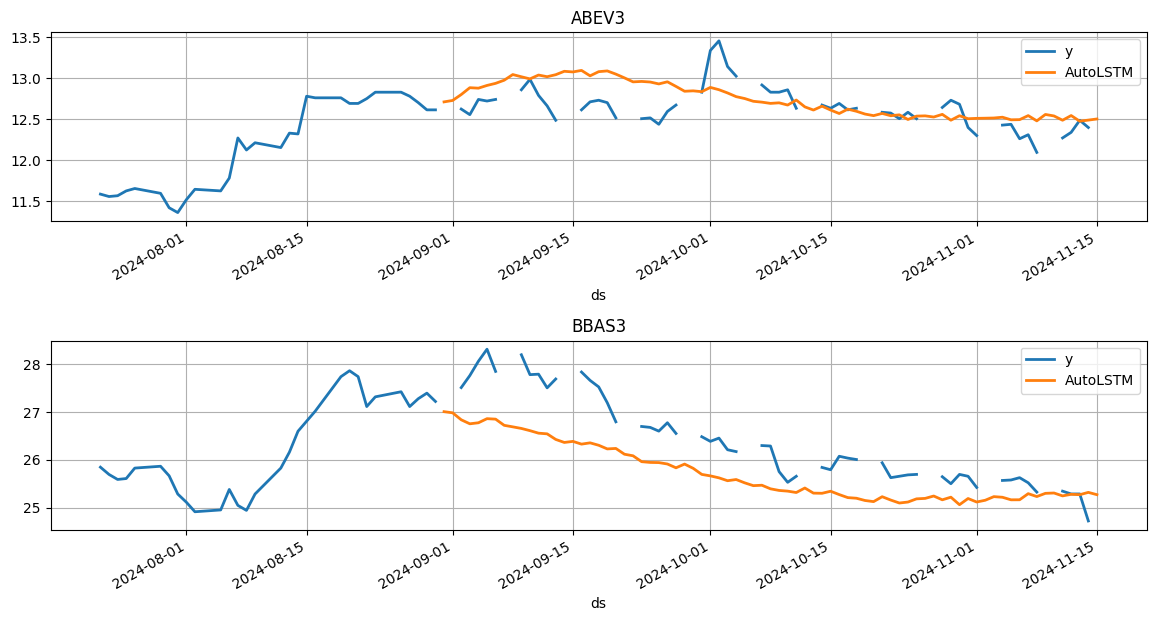

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(1280 / 96, 720 / 96))
fig.tight_layout(pad=7.0)
for ax_i, unique_id in enumerate(["ABEV3", "BBAS3"]):
    plot_df = pd.concat(
        [
            train.loc[train["unique_id"] == unique_id].tail(30),
            p.loc[p["unique_id"] == unique_id],
        ]
    ).set_index("ds")
    plot_df[["y", "AutoLSTM"]].plot(ax=ax[ax_i], linewidth=2, title=unique_id)

    ax[ax_i].grid()

In [33]:
import joblib

joblib.dump(model, "neuralforecast_lstm.joblib")

['neuralforecast_lstm.joblib']

In [ ]:
# Vamos obter as melhores configurações do Tuning

best_config = models[0].results.get_best_result().metrics["config"]

O resultado da busca deve ser algo como em:

{'h': 90,
 'encoder_hidden_size': 100,
 'encoder_n_layers': 3,
 'context_size': 5,
 'decoder_hidden_size': 128,
 'learning_rate': 0.0015887770515036423,
 'max_steps': 500,
 'batch_size': 32,
 'loss': WMAPE(),
 'check_val_every_n_epoch': 100,
 'random_seed': 13,
 'input_size': 5760}

In [38]:
best_config = {
    "h": 77,
    "encoder_hidden_size": 300,
    "encoder_n_layers": 1,
    "context_size": 10,
    "decoder_hidden_size": 64,
    "learning_rate": 0.008279309926218455,
    "max_steps": 10_000,
    "batch_size": 32,
    "loss": WMAPE(),
    "check_val_every_n_epoch": 100,  # 'val_check_steps': 100,
    "random_seed": 19,
    "input_size": 4928,
}

In [39]:
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM

models = [
    LSTM(
        scaler_type="robust",
        #            futr_exog_list=['onpromotion', 'weekday_0',
        #    'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
        #    'weekday_6', 'dcoilwtico'],
        **best_config,
    )
]

model = NeuralForecast(models=models, freq="D")
model.fit(train)

Seed set to 19
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | WMAPE         | 0      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | LSTM          | 363 K  | train
4 | context_adapter | Linear        | 231 K  | train
5 | mlp_decoder     | MLP           | 769    | train
----------------------------------------------------------
596 K     Trainable params
0         Non-trainable params
596 K     Total params
2.385     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10000` reached.


In [40]:
import joblib

joblib.dump(model, "neuralforecast_lstm_v6_10_000_epochs.joblib")

['neuralforecast_lstm_v6_10_000_epochs.joblib']

In [43]:
p = model.predict().reset_index()
p = p.merge(valid[["ds", "unique_id", "y"]], on=["ds", "unique_id"], how="left")
print(wmape(p["y"], p["LSTM"]))

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

0.020077799093674208


/home/felip/Documents/tech-challenge-4/.venv/lib/python3.11/site-packages/neuralforecast/core.py:214: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


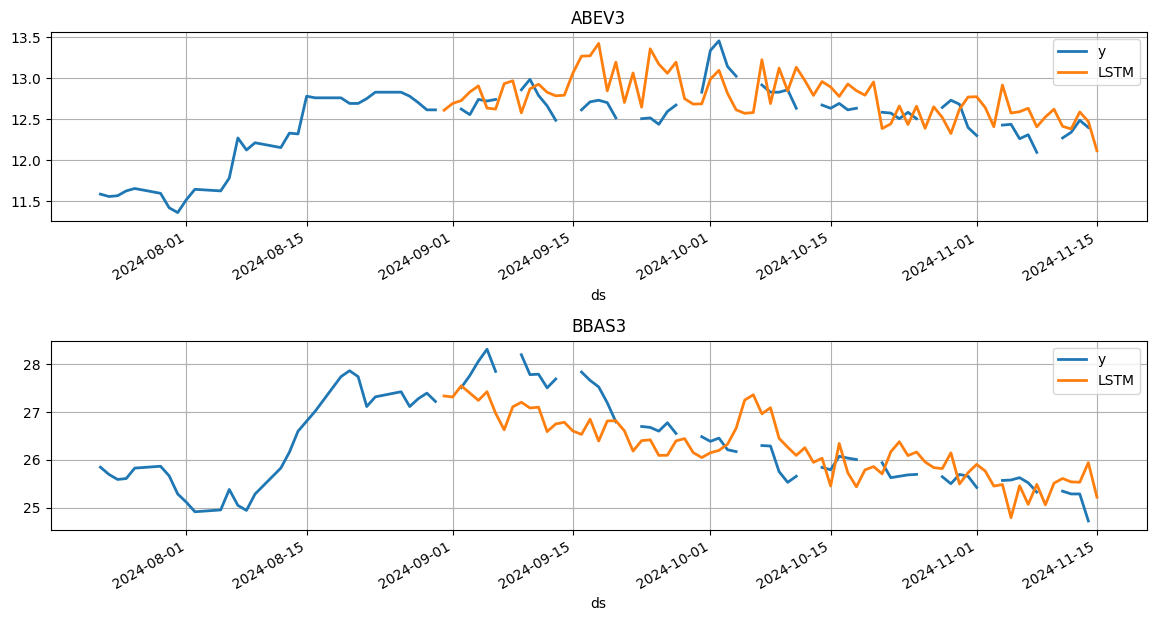

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(1280 / 96, 720 / 96))
fig.tight_layout(pad=7.0)
for ax_i, unique_id in enumerate(["ABEV3", "BBAS3"]):
    plot_df = pd.concat(
        [
            train.loc[train["unique_id"] == unique_id].tail(30),
            p.loc[p["unique_id"] == unique_id],
        ]
    ).set_index("ds")
    plot_df[["y", "LSTM"]].plot(ax=ax[ax_i], linewidth=2, title=unique_id)

    ax[ax_i].grid()

In [ ]:
valid["dcoilwtico"] = train["dcoilwtico"].iloc[-1]

p = model.predict(futr_df=valid).reset_index()
p = p.merge(valid[["ds", "unique_id", "y"]], on=["ds", "unique_id"], how="left")

fig, ax = plt.subplots(2, 1, figsize=(1280 / 96, 720 / 96))
fig.tight_layout(pad=7.0)
for ax_i, unique_id in enumerate(["MEATS", "PERSONAL CARE"]):
    plot_df = pd.concat(
        [
            train.loc[train["unique_id"] == unique_id].tail(30),
            p.loc[p["unique_id"] == unique_id],
        ]
    ).set_index("ds")  # Concatenate the train and forecast dataframes
    plot_df[["y", "LSTM"]].plot(ax=ax[ax_i], linewidth=2, title=unique_id)

    ax[ax_i].grid()

print(wmape(p["y"], p["LSTM"]))

## Baseline com SeasonalNaive

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import SeasonalNaive

model = StatsForecast(models=[SeasonalNaive(season_length=7)], freq="D", n_jobs=-1)
model.fit(train)

forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=["ds", "unique_id"], how="left")
wmape_ = wmape(forecast_df["y"], forecast_df["SeasonalNaive"])
print(f"WMAPE: {wmape_:.2%}")

## Referência

https://mariofilho.com/como-prever-series-temporais-com-lstm-em-python/#como-instalar-a-neuralforecast-com-e-sem-suporte-a-gpu

## Outra opção

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM
from neuralforecast.losses.pytorch import DistributionLoss
from neuralforecast.utils import AirPassengersPanel, AirPassengersStatic

Y_train_df = AirPassengersPanel[
    AirPassengersPanel.ds < AirPassengersPanel["ds"].values[-12]
]  # 132 train
Y_test_df = AirPassengersPanel[
    AirPassengersPanel.ds >= AirPassengersPanel["ds"].values[-12]
].reset_index(drop=True)  # 12 test

nf = NeuralForecast(
    models=[
        LSTM(
            h=12,
            input_size=-1,
            loss=DistributionLoss(distribution="Normal", level=[80, 90]),
            scaler_type="robust",
            encoder_n_layers=2,
            encoder_hidden_size=128,
            context_size=10,
            decoder_hidden_size=128,
            decoder_layers=2,
            max_steps=200,
            futr_exog_list=["y_[lag12]"],
            stat_exog_list=["airline1"],
        )
    ],
    freq="M",
)
nf.fit(df=Y_train_df, static_df=AirPassengersStatic)
Y_hat_df = nf.predict(futr_df=Y_test_df)

Y_hat_df = Y_hat_df.reset_index(drop=False).drop(columns=["unique_id", "ds"])
plot_df = pd.concat([Y_test_df, Y_hat_df], axis=1)
plot_df = pd.concat([Y_train_df, plot_df])

plot_df = plot_df[plot_df.unique_id == "Airline1"].drop("unique_id", axis=1)
plt.plot(plot_df["ds"], plot_df["y"], c="black", label="True")
plt.plot(plot_df["ds"], plot_df["LSTM"], c="purple", label="mean")
plt.plot(plot_df["ds"], plot_df["LSTM-median"], c="blue", label="median")
plt.fill_between(
    x=plot_df["ds"][-12:],
    y1=plot_df["LSTM-lo-90"][-12:].values,
    y2=plot_df["LSTM-hi-90"][-12:].values,
    alpha=0.4,
    label="level 90",
)
plt.legend()
plt.grid()
plt.plot()